<a href="https://colab.research.google.com/github/KatrinaLiqy/SocialBotDetection/blob/main/DatasetsAnalysisHeatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd

In [3]:
# 0. varol-icwsm - B733 H1495
# 1. cresci-17 - B7049 H2764
# 2. pronbots - Only Bots 17882
# 3. celebrity - Only Humans 5918
# 4. vendor-purchased - Only Bots 1087
# 5. botometer-feedback - B139 H380
# 6. political-bots - Only Bots 62

In [4]:
# Seven training datasets
dataset_path = "data_csv/final"

varol = pd.read_csv(dataset_path + '/varol-17.csv')
cresci_17 = pd.read_csv(dataset_path + '/cresci-17.csv')
pronbots = pd.read_csv(dataset_path + '/pronbots-2019.csv')
celebrity = pd.read_csv(dataset_path + '/celebrity-2019.csv')
vendor = pd.read_csv(dataset_path + '/vendor-purchased-2019.csv')
botometer = pd.read_csv(dataset_path + '/botometer-feedback-2019.csv')
political = pd.read_csv(dataset_path + '/political-bots-2019.csv')

# Testing datasets
botwiki = pd.read_csv(dataset_path + '/botwiki-verified.csv')
midterm = pd.read_csv(dataset_path + '/midterm-2018.csv')
gilani = pd.read_csv(dataset_path + '/gilani-2017.csv')
c_rtbust = pd.read_csv(dataset_path + '/cresci-rtbust-2019.csv')

In [5]:
midterm_bots = midterm.loc[midterm['is_bot']==1]
midterm_humans = midterm.loc[midterm['is_bot']==0]

pronbots_midterm = midterm_humans
celebrity_midterm = midterm_bots.sample(2959)
vendor_midterm = midterm_humans.sample(543)
political_midterm = midterm_humans.sample(31)

pronbots_midterm = pd.concat([pronbots,pronbots_midterm],axis=0,ignore_index=True)
celebrity_midterm = pd.concat([celebrity,celebrity_midterm],axis=0,ignore_index=True)
vendor_midterm = pd.concat([vendor,vendor_midterm],axis=0,ignore_index=True)
political_midterm = pd.concat([political,political_midterm],axis=0,ignore_index=True)

In [6]:
dataset_list = [botwiki, cresci_17, midterm, pronbots_midterm, celebrity_midterm, varol, vendor_midterm, gilani, political_midterm, c_rtbust]

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [9]:
heatmap_array = [[0 for i in range(len(dataset_list))] for j in range(len(dataset_list))]

In [ ]:
for i, train in enumerate(dataset_list):

  X_train = train.iloc[:, 0:20]
  y_train = train.iloc[:, 20]

  clf = RandomForestClassifier(n_estimators=100)
  print("Training ",i)
  clf.fit(X_train, y_train)

  for j, test in enumerate(dataset_list):

    X_test = test.iloc[:, 0:20]
    y_test = test.iloc[:, 20]

    print("Testing ",j)

    roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, -1])
    heatmap_array[i][j] = roc

[Text(0.5, 0, 'botwiki'),
 Text(1.5, 0, 'cresci_17'),
 Text(2.5, 0, 'midterm'),
 Text(3.5, 0, 'pronbots_midterm'),
 Text(4.5, 0, 'celebrity_midterm'),
 Text(5.5, 0, 'varol'),
 Text(6.5, 0, 'vendor_midterm'),
 Text(7.5, 0, 'gilani'),
 Text(8.5, 0, 'political_midterm'),
 Text(9.5, 0, 'c_rtbust')]

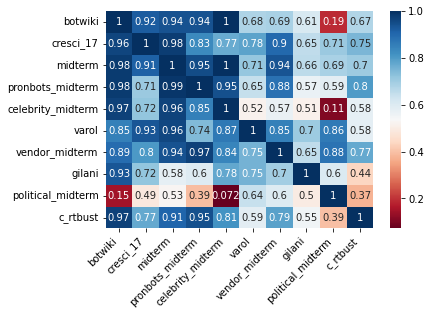

In [11]:
names = ["botwiki", "cresci_17", "midterm", "pronbots_midterm", "celebrity_midterm", "varol", "vendor_midterm", "gilani", "political_midterm", "c_rtbust"]
map = sns.heatmap(heatmap_array, annot=True, xticklabels=names, yticklabels=names, cmap="RdBu")
map.set_xticklabels(map.get_xticklabels(), rotation=45, horizontalalignment='right')